In [1]:
import wandb
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
api = wandb.Api()
all_runs = api.runs('kennychufk/alluvion')

In [3]:
selected_runs = []
for run in all_runs:
    if (len(run.tags) and run.tags[0]=='vis_sweep2' and run.state=='finished'):
        selected_runs.append(run)

In [4]:
kinematic_vis = []
vis = []
bvis = []
best_losses = []
for run in selected_runs:
    vis.append(run.summary['vis_real'])
    bvis.append(run.summary['bvis_real'])
#     vis.append(run.summary['best_x'][0])
#     bvis.append(run.summary['best_x'][1])
    kinematic_vis.append(run.config['kinematic_viscosity_real'])
    best_losses.append(run.summary['best_loss'])

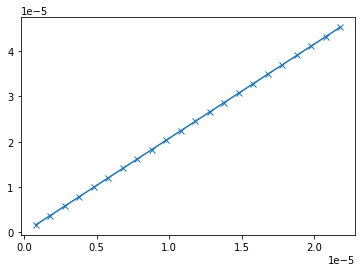

In [5]:
plt.plot(kinematic_vis, vis, marker='x')

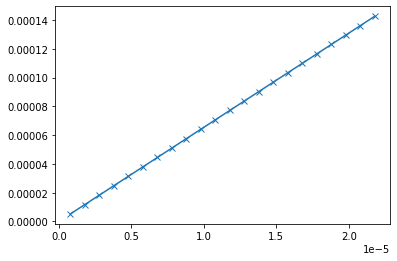

In [6]:
plt.plot(kinematic_vis, bvis, marker='x')

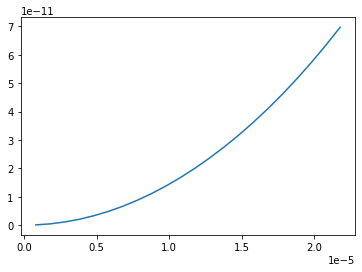

In [7]:
plt.plot(kinematic_vis, best_losses)

In [8]:
reg = LinearRegression().fit(np.array(kinematic_vis).reshape(-1, 1), vis)
reg.coef_[0], reg.intercept_

(2.0761830957036738, 1.0647339827434552e-09)

In [9]:
reg = LinearRegression().fit(np.array(kinematic_vis).reshape(-1, 1), bvis)
reg.coef_[0], reg.intercept_

(6.544046942658794, -2.429370995158124e-08)